<a href="https://colab.research.google.com/github/ujwaldeepkadiyam/Data_Science_and_Machine_Learning/blob/main/Project_Notebook_1_Banking_Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stages in ML Project

1) Problem statement/Goal/Objective

2) Data Exploration Validation

3) Data cleaning

4) Model Building and Validation



#  \[1\]  Problem Statement

A **credit score** is a numerical representation of an individual's creditworthiness, typically ranging from 300 to 850. It helps lenders assess the risk of lending money to individuals. Higher credit scores indicate better creditworthiness, meaning the individual is more likely to repay loans on time, while lower scores indicate higher risk.

### Key Factors That Determine a Credit Score:
1. **Payment History (35%)**:
   - This is the most significant factor. It includes whether you’ve paid past credit accounts on time. Late payments, defaults, bankruptcies, and foreclosures negatively impact your score.

2. **Credit Utilization (30%)**:
   - This is the ratio of current credit card balances to the total credit limit. It’s recommended to keep credit utilization below 30%. For example, if your total credit limit is \$10,000 and your balance is \$3,000, your utilization rate is 30%.

3. **Length of Credit History (15%)**:
   - The longer your credit history, the better. This includes the age of your oldest account, the average age of all accounts, and how long it’s been since you used certain accounts.

4. **Credit Mix (10%)**:
   - Having a variety of credit types (e.g., credit cards, mortgages, auto loans) can help your score. It shows you can manage different types of debt.

5. **New Credit (10%)**:
   - Opening several new credit accounts in a short period can negatively impact your score. Each time you apply for credit, a hard inquiry is made, which can lower your score temporarily.

**Credit risk model building** is the process of developing statistical or machine learning models to assess the likelihood that a borrower or customer will default on their financial obligations. These models are essential in banking, lending, and financial services as they help institutions quantify the level of risk associated with granting loans or credit to customers. A critical model within this domain is the **Probability of Default (PD) model**, which estimates the likelihood that a borrower will default on a loan within a specific timeframe, often one year.


Dataset Location - https://github.com/venkatareddykonasani/Datasets/tree/master/Give%20me%20some%20Credit

# [2] Data Exploration and Data Validation

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

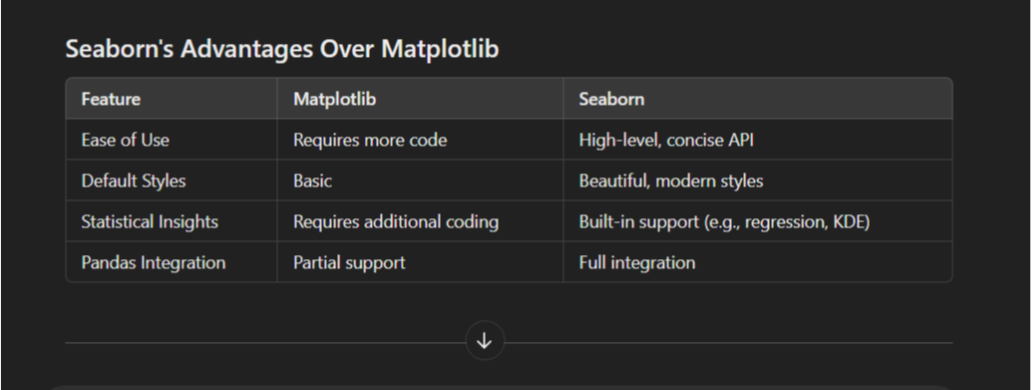

## Import Give me some Credit\cs-training.csv

In [ ]:
loans=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Give%20me%20some%20Credit/cs-training.csv")

In [ ]:
loans.info()

In [ ]:
#What are number of rows and columns
loans.shape

In [ ]:
#Are there any suspicious variables?
loans.columns

In [ ]:
#Display the variable formats
loans.dtypes

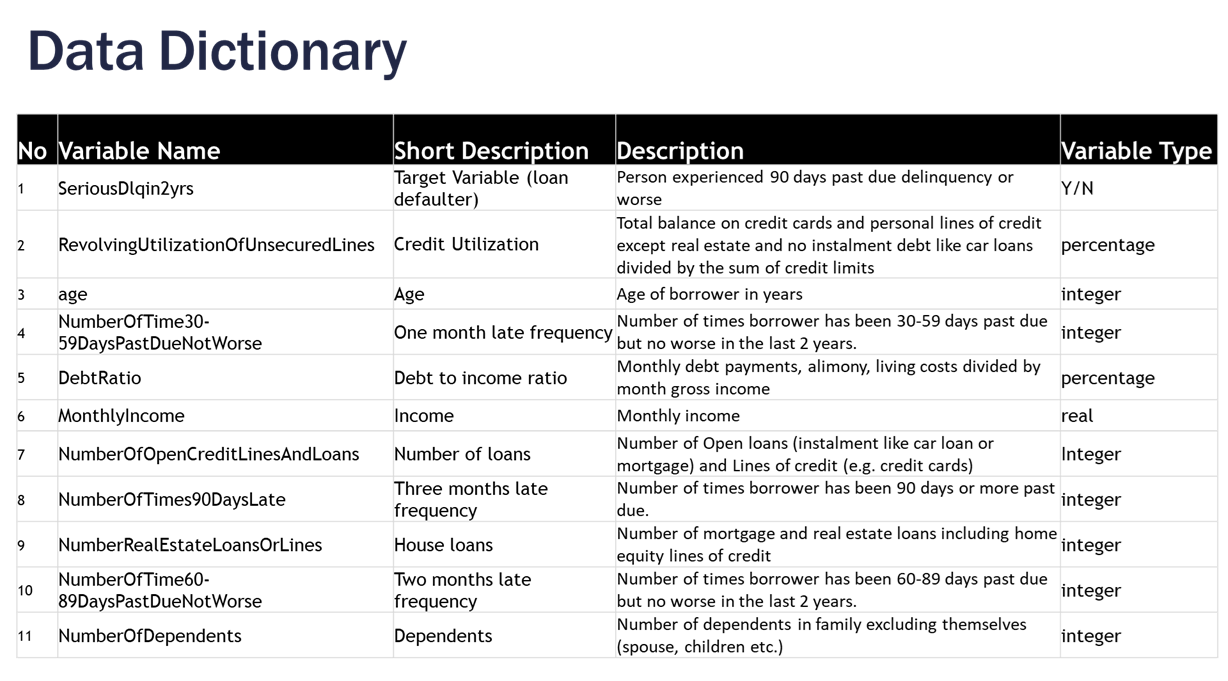

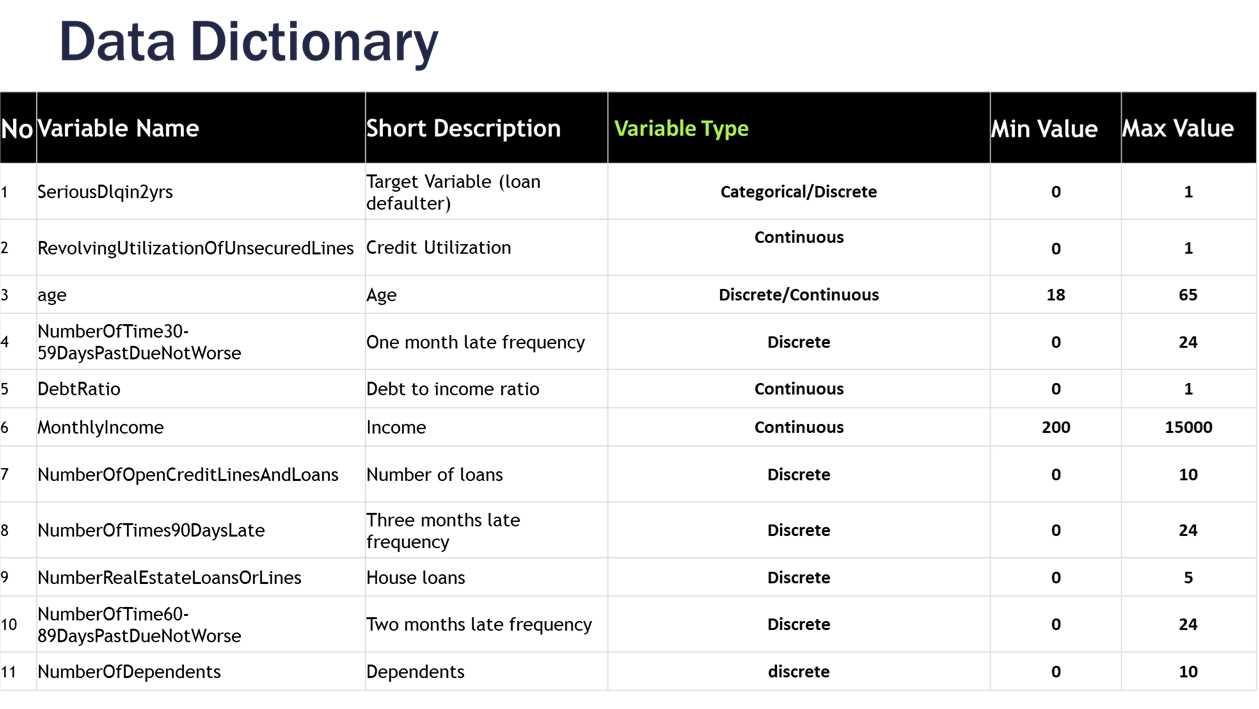

In [ ]:
#Print the first 10 observations
loans.head(10)

In [ ]:
# Calculating null values
loans.isnull().sum()

In [ ]:
loans.isnull().sum()

In [ ]:
loans.isnull().sum().values.sum()# Total number of null entries in the entire data frame

In [ ]:
loans.describe()

In [ ]:
loans.describe().transpose()

In [ ]:
loans.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99]).transpose()

In [ ]:
loans.mean(numeric_only=True) # calculate mean of numeric columns

In [ ]:
loans.median(numeric_only=True)

In [ ]:
for col in loans.columns:
  print("---------------------------")
  print("The difference between mean and median for the variable",col,"is",loans[col].mean() - loans[col].median())
  print("---------------------------")

In [ ]:
print("Number of features:=", len(loans.columns))#loans.shape[0]
print("Number of observations:=", len(loans))#loans.shape[1]

In [ ]:
loans['NumberOfDependents'].nunique()

In [ ]:
for col in loans.columns:
  print("---------------------------")
  print("The unique values in",col,"is",loans[col].nunique())
  print("---------------------------")

**Variable Data Types**

In [ ]:
#What are the categorical and discrete variables? What are the continues variables.
loans.dtypes

**Discrete :**

  * SeriousDlqin2yrs
  * age
  * NumberOfTime30-59DaysPastDueNotWorse
  * NumberOfOpenCreditLinesAndLoans
  * NumberOfTimes90DaysLate
  * NumberRealEstateLoansOrLines
  * NumberOfTime60-89DaysPastDueNotWorse
  * NumberOfDependents

**Continuous :**

  * monthly_utilization
  * DebtRatio
  * MonthlyIncome

**Nominal/Categorical :**

  * No Nominal Variables

  * a nominal variable is a type of data used to label or categorize things without assigning any numerical value or order
  

# Discrete variables exploration

  * **Tip :** Note down the observations for each variable

## Number of dependents is in Float ?

In [ ]:
loans['NumberOfDependents'].value_counts()

*Convert it to integer

In [ ]:
loans['NumberOfDependents']=loans['NumberOfDependents'].astype('Int64')

In [ ]:
loans['NumberOfDependents'].value_counts()

## Check for Null Values

In [ ]:
#Are there any   variables with missing values?
loans.isnull().sum()

**Steps for exploration of discrete variables:**



1.   Use countplot, barplot etc.
2.   Use percentiles.
3.   Check for Null values.
4.   Decide upon outliers.



## Serious Delinquency

In [ ]:
# print(loans['SeriousDlqin2yrs'].value_counts())
loans['SeriousDlqin2yrs'].value_counts(sort=False)

In [ ]:
sns.countplot(x  = "SeriousDlqin2yrs" , data = loans)

* No Outliers in this variable and Class imbalance exists

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='NumberOfDependents', hue = "SeriousDlqin2yrs" , data = loans) # class imbalance
plt.show()

* Tip: create a rough colab worksheet copy this cell as well as other needed info for reference.

In [ ]:
loans.dtypes

In [ ]:
sns.countplot(hue = "SeriousDlqin2yrs" , x = 'age', data = loans)

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(hue = "SeriousDlqin2yrs" , x = 'NumberOfTime30-59DaysPastDueNotWorse', data = loans)
plt.show()

In [ ]:
sns.scatterplot(data=loans, x="NumberRealEstateLoansOrLines", y="NumberOfDependents", hue="SeriousDlqin2yrs")

## Age

In [ ]:
print(loans['age'].nunique())

In [ ]:

plt.figure(figsize=(20,5))# this doesnt work
sns.countplot(loans, x="age",  hue="SeriousDlqin2yrs")#,multiple="stack")#y="body_mass_g",
plt.show()


no delinquents after 90.

In [ ]:
loans.loc[loans['age']<20].value_counts().sum()

In [ ]:
loans['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

## 1 month delay

In [ ]:
print(loans['NumberOfTime30-59DaysPastDueNotWorse'].nunique())

In [ ]:
plt.figure(figsize=(10,8))# this doesnt work
sns.countplot(loans, x="NumberOfTime30-59DaysPastDueNotWorse",  hue="SeriousDlqin2yrs")#,multiple="stack")#y="body_mass_g",
plt.show()

In [ ]:
loans['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

## Number of open credit loans

In [ ]:
plt.figure(figsize=(15,8))# this doesnt work
sns.countplot(loans, x="NumberOfOpenCreditLinesAndLoans",  hue="SeriousDlqin2yrs")#,multiple="stack")#y="body_mass_g",
plt.show()

In [ ]:
loans['NumberOfOpenCreditLinesAndLoans'].value_counts(sort=True)

## 3 month late

In [ ]:
plt.figure(figsize=(15,10))# this doesnt work
sns.countplot(loans, x="NumberOfTimes90DaysLate",  hue="SeriousDlqin2yrs")#,multiple="stack")#y="body_mass_g",
plt.show()

In [ ]:
loans['NumberOfTimes90DaysLate'].value_counts()

## number of real estate loans

In [ ]:
plt.figure(figsize=(15,8))# this doesnt work
sns.countplot(loans, x='NumberRealEstateLoansOrLines',  hue="SeriousDlqin2yrs")#,multiple="stack")#y="body_mass_g",
plt.show()

In [ ]:
loans['NumberRealEstateLoansOrLines'].value_counts()

## 2 month delay

In [ ]:
plt.figure(figsize=(15,10))# this doesnt work
sns.countplot(loans, x='NumberOfTime60-89DaysPastDueNotWorse',  hue="SeriousDlqin2yrs")#,multiple="stack")#y="body_mass_g",
plt.show()

In [ ]:
loans['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

## dependents.

In [ ]:
loans['NumberOfDependents'].isnull().any()

In [ ]:
plt.figure(figsize=(15,10))# this doesnt work
sns.countplot(loans, x='NumberOfDependents',  hue="SeriousDlqin2yrs")#,multiple="stack")#y="body_mass_g",
plt.show()

In [ ]:
loans['NumberOfDependents'].value_counts()

# Continuous variables exploration

**Steps for exploration of Count variables:**



1.   Use boxplot, histplot etc.
2.   Use percentiles.
3.   Check for Null values.
4.   Decide upon outliers.



### Credit utilization

In [ ]:
loans.info()

In [ ]:
# cols=loans.columns
# for var in cols:
#   # print(loans[var].value_counts())
#   # print(pd.unique(loans[var]).sum())
#   print(loans[var].nunique())

In [ ]:
plt.boxplot(loans["monthly_utilization"])

In [ ]:
util_percentiles=loans['monthly_utilization'].quantile([0, 0.1, 0.2,0.3,0.4, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles,2)

In [ ]:
loans['monthly_utilization'].describe()

In [ ]:
sns.histplot(loans["monthly_utilization"], bins=30, kde=True, color='skyblue')#, ax=axes[1])

* Plot again after cleaning the data

### Debt Ratio

In [ ]:
plt.boxplot(loans['DebtRatio'])

In [ ]:
round(loans['DebtRatio'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1]),2)

In [ ]:
sns.histplot(loans["DebtRatio"], bins=30, kde=True, color='skyblue')#, ax=axes[1])

### MonthlyIncome

In [ ]:
loans['MonthlyIncome'].isnull().any()

In [ ]:
loans.boxplot(column="MonthlyIncome")

In [ ]:
#loans.boxplot(column="MonthlyIncome")
non_null_monthly_income=loans["MonthlyIncome"][loans["MonthlyIncome"].isnull()==False]
plt.boxplot(non_null_monthly_income)

In [ ]:
# round(loans['MonthlyIncome'].describe(),2)

In [ ]:
sns.histplot(non_null_monthly_income, bins=30, kde=True, color='skyblue')#, ax=axes[1])

In [ ]:
round(loans['MonthlyIncome'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1]),2)

In [ ]:
loans.loc[loans['MonthlyIncome']<200].value_counts().sum()


In [ ]:
loans.loc[loans['MonthlyIncome']<200].value_counts().sum()/len(loans)

In [ ]:
#Find the percentage of missing values
print("Count of missing values")
print(loans['MonthlyIncome'].isnull().sum())
print("% of missing values")
print(round(loans['MonthlyIncome'].isnull().sum()/len(loans),2))

# [3] Data Cleaning

# Data Cleaning: Continuous

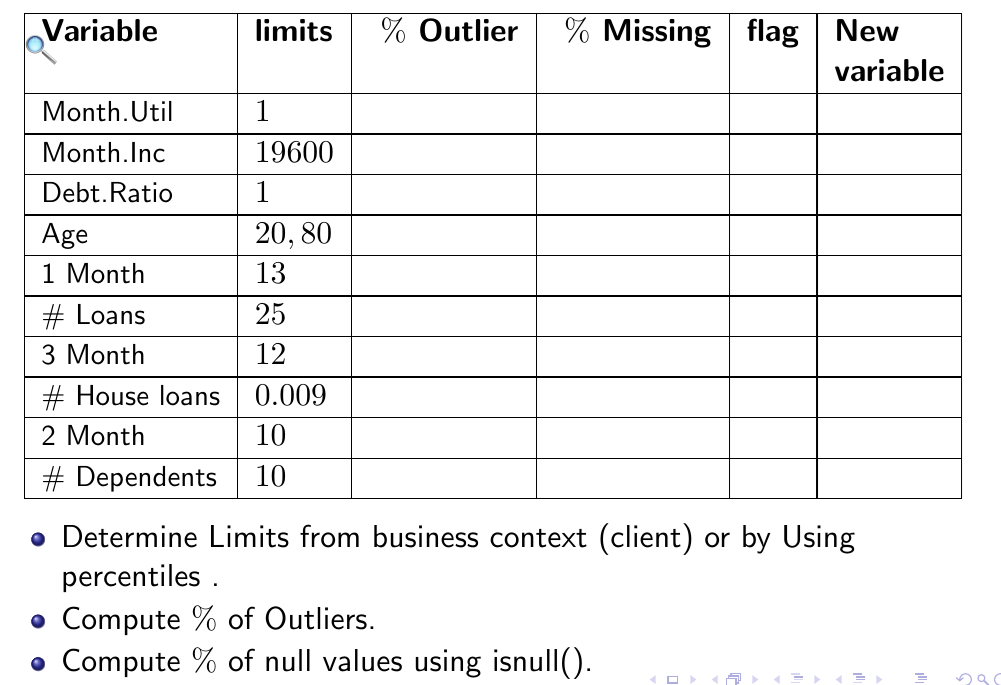

Example:
Percentiles:
```
loans['monthly_utilization'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
```
Percentage of Outliers
```
len(loans.loc[loans['NumberOfDependents']>upper_limit])/len(loans)
```
Percentage of null values

```
loans['NumberOfDependents'].isnull().sum()/len(loans)
```

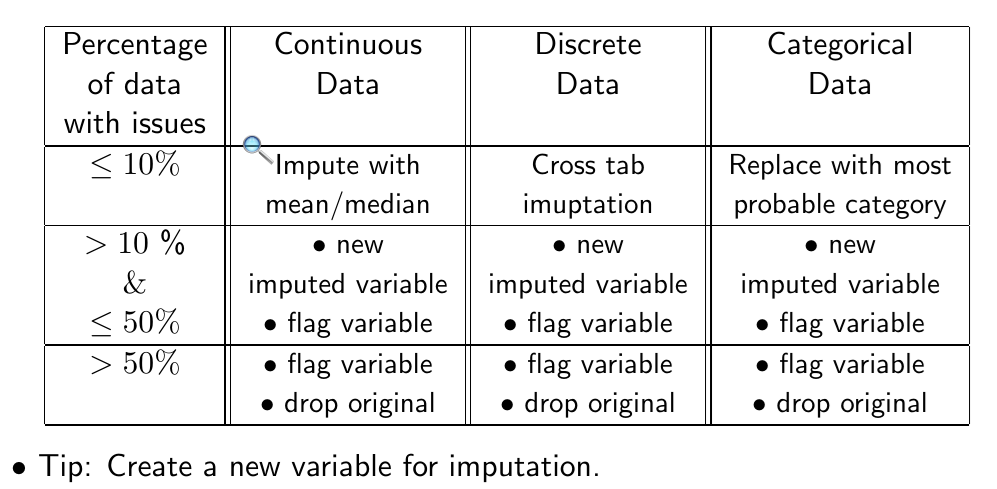

### Data Cleaning - Credit_utilization

In [ ]:
util_percentiles=loans['monthly_utilization'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
# util_percentiles
round(util_percentiles,2)
# round(loans['monthly_utilization'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1]),2)

In [ ]:
median_util=loans['monthly_utilization'].median()
median_util

In [ ]:
loans['cred_util_new']=loans['monthly_utilization']
loans.loc[loans['monthly_utilization']>1,'cred_util_new']=median_util

* Check percentiles again, after imputation

In [ ]:
# percentile distribution for new variable
util_percentiles1=loans['cred_util_new'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles1,2)


In [ ]:
sns.histplot(loans["cred_util_new"], bins=30, kde=True, color='skyblue')#, ax=axes[1])

### Data Cleaning Monthly Income

In [ ]:
#Find the missing value percentage in monthly income
#Once identified where missing values exist, the next task usually is to fill them (data imputation). Depending upon the context,
#in this case, I am assigning median value to all those positions where missing value is present:


In [ ]:
round(loans['MonthlyIncome'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1]),2)

In [ ]:
loans['MonthlyIncome'].isnull().sum()

In [ ]:
round(loans['MonthlyIncome'].isnull().sum()/len(loans),2)

* create a flag variable

In [ ]:
loans['MonthlyIncome_ind'] = 1
loans.loc[loans['MonthlyIncome'].isnull(), 'MonthlyIncome_ind'] = 0
loans.loc[loans['MonthlyIncome']>19600, 'MonthlyIncome_ind'] = 0
loans['MonthlyIncome_ind'].value_counts()

* Imputation

In [ ]:
loans['MonthlyIncome_new'] = loans['MonthlyIncome']
loans.loc[loans['MonthlyIncome'].isnull(), 'MonthlyIncome_new'] = loans['MonthlyIncome'].median()
loans.loc[loans['MonthlyIncome']>19600, 'MonthlyIncome_new'] = loans['MonthlyIncome'].median()

In [ ]:
loans['MonthlyIncome_new'].describe()

In [ ]:
sns.histplot(loans["MonthlyIncome_new"], bins=30, kde=True, color='skyblue')#, ax=axes[1])

### Data cleaning - Debt Ratio

* 24\% of data is outliers
* Create flag variable
* Impute with median

In [ ]:
# creating flag variables. FIRST CHECK THE DATA FRAME
loans.info()

* creating a flag variable

In [ ]:
loans['DebtRatio_ind']=1
loans.loc[loans['DebtRatio']>1,'DebtRatio_ind']=0

In [ ]:
loans.DebtRatio_ind.value_counts()

* checking if the number of flags for each class mataches with the original data

In [ ]:
len(loans.loc[loans['DebtRatio']<=1])

In [ ]:
len(loans.loc[loans['DebtRatio']>1])

* Imputing with median

In [ ]:
loans['DebtRatio_new']=loans['DebtRatio']
loans.loc[loans['DebtRatio']>1,'DebtRatio_new']=loans['DebtRatio'].median()

In [ ]:
loans.DebtRatio_new.describe()

In [ ]:
loans.info()

In [ ]:
sns.histplot(loans["DebtRatio_new"], bins=30, kde=True, color='skyblue')#, ax=axes[1])

# Data cleaning: Discrete

### Age

In [ ]:
len(loans.loc[loans['age']>80])/len(loans)

In [ ]:
loans['age_new']=loans['age']
loans.loc[loans['age']>80, 'age_new']=loans['age'].median()

In [ ]:

plt.figure(figsize=(20,10))# this doesnt work
sns.countplot(loans, x="age_new",  hue="SeriousDlqin2yrs")#,multiple="stack")#y="body_mass_g",
plt.show()


In [ ]:
loans.age_new.info()

### 1 month delay

In [ ]:
len(loans.loc[loans['NumberOfTime30-59DaysPastDueNotWorse']>13])/len(loans)

In [ ]:
freq_table_30dpd=loans['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()
freq_table_30dpd

* Question : When should cross tab be used ?

In [ ]:
#Clean the variable- Look at the cross tab of variable vs target. Impute based on target .
#Cross tab with target
import pandas as pd
cross_tab_30dpd_target=pd.crosstab(loans['NumberOfTime30-59DaysPastDueNotWorse'],loans['SeriousDlqin2yrs'])
cross_tab_30dpd_target.transpose()

* **cross_tab_30dpd_target:** A pandas DataFrame (likely a cross-tabulation) with categories as rows and columns.

* **Purpose:** Normalize each row in the DataFrame to calculate percentages of column values relative to the row total.

* **apply(lambda x: x/x.sum(), axis=1):** Applies a function row-wise (axis=1) to divide each value in a row by the row's sum.

* **Result:** Converts raw counts in the table to proportions (or percentages).

* **round(..., 2):** Rounds the resulting proportions to 2 decimal places for clarity.

In [ ]:
#Cross tab row Percentages
cross_tab_30dpd_target_percent=cross_tab_30dpd_target.apply(lambda x: x/x.sum(), axis=1)
round(cross_tab_30dpd_target_percent,2).transpose()

In [ ]:

#Percentage of 0 and 1 are of 98 is near to percentages of 6.
#Replacing error values with 6

loans['num_30_59_dpd_new']=loans['NumberOfTime30-59DaysPastDueNotWorse']
# loans['num_30_59_dpd_new'][loans['num_30_59_dpd_new']>13]=6
loans.loc[loans['num_30_59_dpd_new']>13,'num_30_59_dpd_new']=6
loans['num_30_59_dpd_new']

loans['num_30_59_dpd_new'].value_counts()

In [ ]:
cross_tab_new_target=pd.crosstab(loans['num_30_59_dpd_new'],loans['SeriousDlqin2yrs'])
round(cross_tab_new_target.apply(lambda x: x/x.sum(), axis=1),2)
# round(cross_tab_30dpd_target_percent,2)

In [ ]:
loans.columns

### NumberOfOpenCreditLinesAndLoans

In [ ]:
len(loans.loc[loans['NumberOfOpenCreditLinesAndLoans']>25])/len(loans)

In [ ]:
loans["NumberOfOpenCreditLinesAndLoans"].nunique()

In [ ]:
loans["NumberOfOpenCreditLinesAndLoans"].value_counts(sort=False)

In [ ]:
round(len(loans.loc[loans['NumberOfOpenCreditLinesAndLoans']<20])/len(loans),2)

In [ ]:
round(len(loans.loc[loans['NumberOfOpenCreditLinesAndLoans']<25])/len(loans),2)

In [ ]:
loans["NumberOfOpenCreditLinesAndLoans"].quantile([0, 0.1, 0.2,0.3,0.4, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])

In [ ]:
loans["Open_Credit_lines_new"]=loans["NumberOfOpenCreditLinesAndLoans"]
# loans["Open_Credit_lines_new"][loans["Open_Credit_lines_new"]>20]=loans["NumberOfOpenCreditLinesAndLoans"].median()
loans.loc[loans['Open_Credit_lines_new']>10,'Open_Credit_lines_new']=loans['NumberOfOpenCreditLinesAndLoans'].median()
loans.info()

## NumberOfTimes90DaysLate

In [ ]:
len(loans.loc[loans['NumberOfTimes90DaysLate']>12])/len(loans)

In [ ]:
cross_tab_90dpd_target=pd.crosstab(loans['NumberOfTimes90DaysLate'],loans['SeriousDlqin2yrs'])
cross_tab_90dpd_target

In [ ]:
cross_tab_90dpd_target_percent=cross_tab_90dpd_target.astype(float).div(cross_tab_90dpd_target.sum(axis=1), axis=0)
round(cross_tab_90dpd_target_percent,2)

In [ ]:
loans['num_90_dpd_new']=loans['NumberOfTimes90DaysLate']
# loans['num_90_dpd_new'][loans['num_90_dpd_new']>12]=3
loans.loc[loans['num_90_dpd_new']>12,'num_90_dpd_new']=3
loans['num_90_dpd_new']

loans['num_90_dpd_new'].value_counts(sort=False)

## NumberRealEstateLoansOrLines

In [ ]:
len(loans.loc[loans['NumberRealEstateLoansOrLines']>4])/len(loans)

In [ ]:
loans["NumberRealEstateLoansOrLines"].quantile([0, 0.1, 0.2,0.3,0.4, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])

In [ ]:
loans["Real_estate_loans_new"]=loans["NumberRealEstateLoansOrLines"]
# loans["Real_estate_loans_new"][loans["Real_estate_loans_new"]>4]=loans["NumberRealEstateLoansOrLines"].median()
loans.loc[loans['Real_estate_loans_new']>4,'Real_estate_loans_new']=loans['NumberRealEstateLoansOrLines'].median()

## NumberOfTime60-89DaysPastDueNotWorse

In [ ]:
len(loans.loc[loans['NumberOfTime60-89DaysPastDueNotWorse']>10])/len(loans)

In [ ]:
loans["NumberOfTime60-89DaysPastDueNotWorse"].quantile([0, 0.1, 0.2,0.3,0.4, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])

In [ ]:
loans['num_60_dpd_new']=loans['NumberOfTime60-89DaysPastDueNotWorse']
loans.loc[loans['num_60_dpd_new']>10,'num_60_dpd_new']=3
loans['num_60_dpd_new']

loans['num_60_dpd_new'].value_counts(sort=False)

## NumberOfDependents

In [ ]:
len(loans.loc[loans['NumberOfDependents']>10])/len(loans)

In [ ]:
len(loans.loc[loans['NumberOfDependents'].isnull()])/len(loans)

In [ ]:
loans['NumberOfDependents'].isnull().sum()/len(loans)

In [ ]:
loans["NumberOfDependents"].value_counts()

In [ ]:
loans["NumberOfDependents"].isnull().sum()

In [ ]:
loans["NumberOfDependents_new"]=loans["NumberOfDependents"]
loans.loc[(loans['NumberOfDependents_new']>10) | (loans['NumberOfDependents_new'].isnull()), 'NumberOfDependents_new'] = loans['NumberOfDependents'].median()

In [ ]:
loans["NumberOfDependents_new"].isnull().sum()

In [ ]:
loans["NumberOfDependents_new"].value_counts()

# Exporting the final dataset

In [ ]:
loans.to_csv("loans_cleaned.csv")

# Importing Already Cleaned Dataset

In [ ]:
loans=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Credit_Risk_Cleaned/Cleaned_cs_training.csv")

In [ ]:
loans.describe()

In [ ]:
loans.columns

# [4] Model Building and Validation

# Model - 1: Logistic Regression.

In [ ]:
X = loans.drop(['Sr_No', 'SeriousDlqin2yrs'],axis = 1)
y = loans['SeriousDlqin2yrs']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logistic = LogisticRegression()
logistic.fit(X,y)

In [ ]:
# Checking the intercept and coefficient values.
print("Intercept =" , logistic.intercept_)
print("coefficients = \n " , logistic.coef_)

In [ ]:
# calculating the accuracy of the model on train data
import numpy as np
from sklearn.metrics import confusion_matrix

predict = logistic.predict(X)
cm = confusion_matrix(y,predict)
print("COnfusion matrix = \n" , cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Overall accuracy for all the variables = " , accuracy)

In [ ]:
cm

In [ ]:
sum(cm)

In [ ]:
sum(sum(cm))

* **Checking the p value of the variables to find the impactful and non impactful variables.**

A variable is impactful if the p value is $<$0.05 and non impactful if the p value is $\ge$ 0.05.

In [ ]:
# Checking the p value for individual impact of the variables on the targe variable.
import statsmodels.api as sm
sm = sm.Logit(y,X)
sm.fit()
print(sm.fit().summary())

## Multicollinearity Checking

**VIF**

If VIF $>5$ for any two or more variables, then it is a clear case of multicollinearity between those variables.

In [ ]:
# Defining user defined function for Variation Inflation Factor
def vif_cal(input_data,dependent_col):
  import statsmodels.formula.api as sm
  x_vars=input_data.drop([dependent_col], axis=1)
  xvar_names=x_vars.columns
  for i in range(0,xvar_names.shape[0]):
    y=x_vars[xvar_names[i]]
    x=x_vars[xvar_names.drop(xvar_names[i])]
    rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
    vif=round(1/(1-rsq),2)
    print (xvar_names[i], " VIF = " , vif)

In [ ]:
# Calculating VIF
vif_cal(loans,'SeriousDlqin2yrs')

## Building Model without Multicollinearity and with impactful variables

In [ ]:
#Drop DebtRatio_new based on the P-Value

X=loans.drop(["SeriousDlqin2yrs","Sr_No","DebtRatio_new"],axis=1)
y=loans["SeriousDlqin2yrs"]

import statsmodels.api as sm
model_temp=sm.Logit(y,X)
model=model_temp.fit()
print(model.summary())


## Verifying Sensitivity and specificity

In [ ]:
X = loans.drop(['Sr_No', 'SeriousDlqin2yrs',"DebtRatio_new"],axis = 1)
y = loans['SeriousDlqin2yrs']

In [ ]:
logistic = LogisticRegression()
logistic.fit(X,y)

* Prediction

In [ ]:
# Predicting the if a person takes personal loan or not using logistic fit.
prediction_probability = logistic.predict_proba(X)
prediction_probability[: , 1]
threshold = 0.5
predict = [0 if x < threshold else 1 for x in list(prediction_probability[: , 1])]

* Calculating the accuracy, sensitivity, specificity

In [ ]:
cm = confusion_matrix(y,predict)
print("Confusion matrix = \n" , cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / (total)
print("Overall accuracy = " , accuracy)

sensitivity = (cm[0,0]) / (cm[0,0] + cm[0,1])
print("Sensitivity = " , sensitivity)

specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificty = " , specificity)

### Varying the Threshold


Sensitivity and Specificity with different thresholds

In [ ]:
# Prediction for threshold
threshold1 = 0.2
predict1 = [0 if x < threshold1 else 1 for x in list(prediction_probability[: , 1])]
print(predict1[0:10])


cm1 = confusion_matrix(y,predict1)
print("Confusion matrix = \n" , cm1)

total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0] + cm1[1,1]) / (total1)
print("Overall accuracy = " , accuracy)

sensitivity1 = (cm1[0,0]) / (cm1[0,0] + cm1[0,1])
print("Sensitivity = " , sensitivity1)

specificity1 = cm1[1,1] / ((cm1[1,0] + cm1[1,1]))
print("Specificty = " , specificity1)

As threshold is decreases from 0.5 to 0.2, the sensitivity decreases(class 0 accuracy) and the specificity increases(class 1 accuracy).

In [ ]:
# Prediction for threshold
threshold2 = 0.8
predict2 = [0 if x < threshold2 else 1 for x in list(prediction_probability[: , 1])]
print(predict2[0:10])


cm2 = confusion_matrix(y,predict2)
print("Confusion matrix = \n" , cm2)

total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0] + cm2[1,1]) / (total2)
print("Overall accuracy = " , accuracy)

sensitivity2 = (cm2[0,0]) / (cm2[0,0] + cm2[0,1])
print("Sensitivity = " , sensitivity2)

specificity2 = cm2[1,1] / (cm2[1,0] + cm2[1,1])
print("Specificty = " , specificity2)

As threshold increases from 0.5 to 0.8, the sensitivity (class 0 accuracy) increases and specificity(class 1 accuracy) decreases.

In [ ]:
 # Calculating precision, recall and F1 score
threshold1 = 0.5
predict1 = [0 if x < threshold1 else 1 for x in list(prediction_probability[: , 1] )]


cm1 = confusion_matrix(y,predict1)
print("Confusion matrix = \n" , cm1)

total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0] + cm1[1,1]) / (total1)
print("Overall accuracy = " , accuracy)

Precision_class0 = cm1[0,0] / (cm1[0,0] + cm1[1,0])
print("Precision of class 0 = " , Precision_class0)

Precision_class1 = cm1[1,1] / (cm1[0,1] + cm1[1,1])
print("Precision of class 1 = " , Precision_class1)

Recall_class0 = cm1[0,0] / (cm1[0,0] + cm1[0,1])
print("Recall of class 0 = " , Recall_class0)

Recall_class1 = cm1[1,1] / (cm1[1,0] + cm1[1,1])
print("Recall of class 1 = " , Recall_class1)


F1_Class1 = 2 / ((1/Precision_class1) + (1 / Recall_class1))
print("F1 Score of class 1 = " , F1_Class1)

* class 1 accuracy is very important. However it is very low..

# Model - 2: Decision Trees

In [ ]:
X = loans.drop(['Sr_No', 'SeriousDlqin2yrs'],axis = 1)
y = loans['SeriousDlqin2yrs']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Building a Decision Tree model
Dtree= DecisionTreeClassifier(max_depth = 2)   # check for maxdept =2,1
Dtree.fit(X,y)

* sklearn.tree is a module in scikit-learn that provides tools for creating decision tree models for classification and regression tasks.

In [ ]:
# Plotting the tree
from sklearn.tree import plot_tree, export_text
plt.figure(figsize = (15,7))
plot_tree(Dtree , filled = True , rounded = True , impurity = False  , feature_names = list(X.columns))
print(export_text(Dtree , feature_names = list(X.columns)))
plt.show()

In [ ]:
# Finding the accuracy of the model
predict = Dtree.predict(X) ## Prediction using decision tree model

cm = confusion_matrix(y,predict) # constructing the confusion matrix.
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the decision tree model = " , accuracy)

## Check for overfitting

When really large tree is build ,  the model is very likely to be overfitted.
Overfitted model means that the train accuracy is very large whereas the test accuracy is considerably very low.
If the train and test accuracy differ by more than 5 points then the model is considered as overfitted model.

In [ ]:
X = loans.drop(['Sr_No', 'SeriousDlqin2yrs'],axis = 1)
y = loans['SeriousDlqin2yrs']

# Creating train and test data
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, train_size = 0.8 , random_state = 22)

In [ ]:
# training the model
from sklearn import tree
Dtree1 = tree.DecisionTreeClassifier(max_depth = 3)
Dtree1.fit(X_train,y_train)

In [ ]:
# Plotting the model using train data
from sklearn.tree import plot_tree , export_text
plt.figure(figsize = (15,7))
plot_tree(Dtree1, filled = True , rounded = True , impurity = True , feature_names = list(X.columns))
print( export_text(Dtree1, feature_names =list(X.columns)))


* Train Accuracy

In [ ]:
# Finding the accuracy of the model on train data
predict = Dtree1.predict(X_train)

cm = confusion_matrix(y_train,predict)
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the  model on train data= " , accuracy)

In [ ]:
sensitivity = (cm[0,0]) / (cm[0,0]+cm[0,1])
print("Sensitivity of Train data = " , sensitivity)

specificity = (cm[1,1]) / (cm[1,0] + cm[1,1])
print("Specificty of train data = " , specificity)

* Test Accuracy

In [ ]:
# Finding the accuracy of the model on test data
predict = Dtree1.predict(X_test)

cm = confusion_matrix(y_test,predict)
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the decision tree model on test data = " , accuracy)

In [ ]:
sensitivity = (cm[0,0]) / (cm[0,0]+cm[0,1])
print("Sensitivity = " , sensitivity)

specificity = (cm[1,1]) / (cm[1,0] + cm[1,1])
print("Specificty = " , specificity)

Here we can observe that the train and test accuracy are close enough. Hence the model is not overfitted.

* No need to check for underfitting

# Handling Class Imablance using SMOTE technique

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy=0.6, random_state=44)

X_train_smote, y_train_smote=smote.fit_resample(X_train,y_train)

import collections
print("Before SMOTE", collections.Counter(y_train))
print("After SMOTE", collections.Counter(y_train_smote))

# Model-3 Logistic Regression with balanced data - SMOTE

In [ ]:
model=sm.Logit(y_train_smote,X_train_smote).fit()
print(model.summary())

In [ ]:
#Confusion matrix and Accuracy
tran_pred=model.predict(X_train_smote)
test_pred=model.predict(X_test)

#confusion matrix
train_cm=confusion_matrix(y_train_smote,np.round(tran_pred))
test_cm=confusion_matrix(y_test,np.round(test_pred))

print("Train Confusion Matrix\n", train_cm)
print("Test Confusion Matrix\n", test_cm)


In [ ]:
#Class-0 and Class-1 Accuracy
class_0_acc=train_cm[0,0]/(train_cm[0,0]+train_cm[0,1])
class_1_acc=train_cm[1,1]/(train_cm[1,0]+train_cm[1,1])

print("Class-0 Accuracy", class_0_acc)
print("Class-1 Accuracy", class_1_acc)

In [ ]:
#Class-0 and Class-1 Accuracy on test data
class_0_acc=test_cm[0,0]/(test_cm[0,0]+test_cm[0,1])
class_1_acc=test_cm[1,1]/(test_cm[1,0]+test_cm[1,1])

print("Class-0 Accuracy", class_0_acc)
print("Class-1 Accuracy", class_1_acc)

* Specificity has increased

# Model-4: Decision Tree on Balanced Data -SMOTE

* with max depth = 2

In [ ]:
# training the model
from sklearn import tree
Dtree2 = tree.DecisionTreeClassifier(max_depth = 2) #observe and change to 3
Dtree2.fit(X_train_smote,y_train_smote) # Fit model on balanced data.

In [ ]:
# Plotting the model using train data
from sklearn.tree import plot_tree , export_text
plt.figure(figsize = (15,7))
plot_tree(Dtree2, filled = True , rounded = True , impurity = False , feature_names = list(X_train_smote.columns))
print( export_text(Dtree2, feature_names =list(X_train_smote.columns)))

In [ ]:
# Finding the accuracy of the model on train data
predict = Dtree2.predict(X_train_smote)

cm = confusion_matrix(y_train_smote,predict)
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the  model on train data= " , accuracy)

In [ ]:
sensitivity = (cm[0,0]) / (cm[0,0]+cm[0,1])
print("Sensitivity = " , sensitivity)

specificity = (cm[1,1]) / (cm[1,0] + cm[1,1])
print("Specificty = " , specificity)

In [ ]:
# Finding the accuracy of the model on test data
predict = Dtree2.predict(X_test)

cm = confusion_matrix(y_test,predict)
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the decision tree model on test data = " , accuracy)

In [ ]:
sensitivity = (cm[0,0]) / (cm[0,0]+cm[0,1])
print("Sensitivity = " , sensitivity)

specificity = (cm[1,1]) / (cm[1,0] + cm[1,1])
print("Specificty = " , specificity)

* With Max_depth = 3

In [ ]:
# training the model
from sklearn import tree
Dtree2 = tree.DecisionTreeClassifier(max_depth = 3) #observe and change to 3
Dtree2.fit(X_train_smote,y_train_smote) # Fit model on balanced data.

In [ ]:
# Plotting the model using train data
from sklearn.tree import plot_tree , export_text
plt.figure(figsize = (15,7))
plot_tree(Dtree2, filled = True , rounded = True , impurity = False , feature_names = list(X_train_smote.columns))
print( export_text(Dtree2, feature_names =list(X_train_smote.columns)))

In [ ]:
# Finding the accuracy of the model on train data
predict = Dtree2.predict(X_train_smote)

cm = confusion_matrix(y_train_smote,predict)
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the  model on train data= " , accuracy)

In [ ]:
sensitivity = (cm[0,0]) / (cm[0,0]+cm[0,1])
print("Sensitivity = " , sensitivity)

specificity = (cm[1,1]) / (cm[1,0] + cm[1,1])
print("Specificty = " , specificity)

In [ ]:
# Finding the accuracy of the model on test data
predict = Dtree2.predict(X_test)

cm = confusion_matrix(y_test,predict)
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the decision tree model on test data = " , accuracy)

In [ ]:
sensitivity = (cm[0,0]) / (cm[0,0]+cm[0,1])
print("Sensitivity = " , sensitivity)

specificity = (cm[1,1]) / (cm[1,0] + cm[1,1])
print("Specificty = " , specificity)

* with max_depth=4

In [ ]:
# training the model
from sklearn import tree
Dtree2 = tree.DecisionTreeClassifier(max_depth = 4) #observe and change to 3
Dtree2.fit(X_train_smote,y_train_smote) # Fit model on balanced data.

In [ ]:
# Plotting the model using train data
from sklearn.tree import plot_tree , export_text
plt.figure(figsize = (15,7))
plot_tree(Dtree2, filled = True , rounded = True , impurity = False , feature_names = list(X_train_smote.columns))
print( export_text(Dtree2, feature_names =list(X_train_smote.columns)))

In [ ]:
# Finding the accuracy of the model on train data
predict = Dtree2.predict(X_train_smote)

cm = confusion_matrix(y_train_smote,predict)
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the  model on train data= " , accuracy)

In [ ]:
sensitivity = (cm[0,0]) / (cm[0,0]+cm[0,1])
print("Sensitivity = " , sensitivity)

specificity = (cm[1,1]) / (cm[1,0] + cm[1,1])
print("Specificty = " , specificity)

In [ ]:
# Finding the accuracy of the model on test data
predict = Dtree2.predict(X_test)

cm = confusion_matrix(y_test,predict)
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the decision tree model on test data = " , accuracy)

In [ ]:
sensitivity = (cm[0,0]) / (cm[0,0]+cm[0,1])
print("Sensitivity = " , sensitivity)

specificity = (cm[1,1]) / (cm[1,0] + cm[1,1])
print("Specificty = " , specificity)

## Experimenting with Different `max_depth` Values**
Try different values for `max_depth` and compare accuracy:
```python
for depth in [1, 2, 3, 5]:
    Dtree = DecisionTreeClassifier(max_depth=depth)
    Dtree.fit(X, y)
    y_pred = Dtree.predict(X)
    y_pred_train = Dtree.predict(X_train)
    y_pred_train_balanced = Dtree.predict(X_train_balanced)
    y_pred_test = Dtree.predict(X_test)


    acc = accuracy_score(y, y_pred)
    train_accuracy = accuracy_score(y_train,y_pred_train)
    balanced_train_accuracy = accuracy_score(y_train_balanced,y_pred_train_balanced)
    test_accuracy = accuracy_score(y_test,y_pred_test)
    print(f"Accuracy for max_depth={depth}: {acc:.4f}")
```
- This helps **find the best depth** for your dataset.

**Summary of Model building**

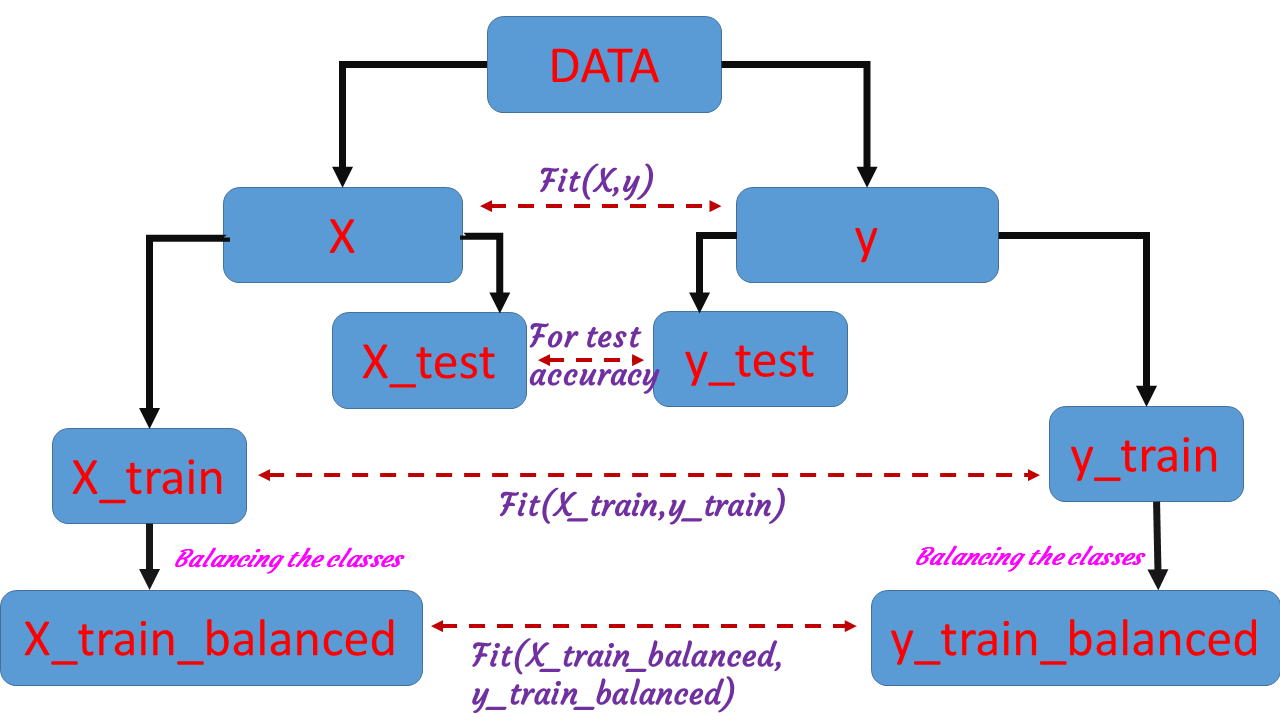


- Load the dataset and create a data frame.
- Perform basic exploration of the data frame.
- Categorize variables into:
  - **Discrete**: Frequency plot, percentiles
  - **Continuous**: Boxplots, percentiles, histplot
  - **Categorical**: Frequency plots
- **Thresholds**: Obtain from client or from data.
- Clean the data and create the final data frame.
- **Model Building**:
  - Split `X` and `y`.
  - Use `X` and `y` to build the model.
  - Or, split `X` and `y` into `X_train`, `y_train`, `X_test`, `y_test`.
  - Build models and check accuracy, sensitivity, specificity.



#### **Which Parameters to use When**
| **Variables used for <br> Model building** | **Variable to be <br> used for Prediction** | **Variables to be <br> used for Confusion matrix** |
|------------|------------------------|--------------------|
| **.fit(X,y)** | **y_pred = .predict(X)** | **confusion_matrix(y, y_pred)** |
| **.fit(X_train,y_train)** | **y_pred_train = .predict(X_train)** | **confusion_matrix(y_train, y_pred_train)** |
| **.fit(X_train_balanced,y_train_balanced)** | **y_pred_train_balanced = .predict(X_train_balanced)** | **confusion_matrix(y_train_balanced, y_pred_train_balanced)** |


$\bullet$ **X_test and y_test will never be used to build the model, but are only used for determining accuracy, recall, precision on test data**.
